<a href="https://colab.research.google.com/github/Lotaristo/Lotaristo/blob/main/ProductsPriceDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Предсказание суммы заказа товара
В данном датасете указаны суммы заказов на определенные виды продовольственных товаров по различным регионам. На его основе хотелось бы попытаться создать простую модель, которая сможет предсказать примерную сумму заказа в будущем.

### Загрузка данных и обработка


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/data.csv', encoding = 'cp1251', sep = ';')
print(df.shape)
df.head(25)

(8190, 8)


,Номер заказа,Вес,Цена,Сумма,Товар,Дата заказа,Регион,Город
0,ORD148341,"8,6","179,9","1547,14",Нектарины,01.01.2014,Ивановская область,Кинешма
1,ORD148449,"10,8","179,9","1942,92",Нектарины,02.01.2014,Тульская область,Донской
2,ORD148641,"10,8","850,9","9189,72",Базилик зеленый,03.01.2014,Воронежская область,Борисоглебск
3,ORD148342,"9,8","45,5","445,9",Апельсины стандарт (2 сорт),01.01.2014,Калужская область,Обнинск
4,ORD148586,"7,6","89,9","683,24",Капуста китайская,03.01.2014,Смоленская область,Вязьма
5,ORD148417,"4,8","299,9","1439,52",Манго зелено-красное,01.01.2014,Орловская область,Ливны
6,ORD148459,"0,8","179,9","143,92",Лук шалот,02.01.2014,Тверская область,Тверь
7,ORD155990,"7,2",50,360,"Зелёный салат Блюз от ""Московского""",22.03.2014,Калужская область,Обнинск
8,ORD148434,не опр,не опр,не опр,Яблоки Айдаред,01.01.2014,Брянская область,Клинцы
9,ORD148455,"7,2","94,9","683,28",Яблоки Ред Чиф,02.01.2014,Брянская область,Клинцы


Примерно так выглядит датасет. В целом, нужно будет провести некоторые действия для его подготовки.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Номер заказа  8190 non-null   object
 1   Вес           8187 non-null   object
 2   Цена          8187 non-null   object
 3   Сумма         8187 non-null   object
 4   Товар         8190 non-null   object
 5   Дата заказа   8190 non-null   object
 6   Регион        8190 non-null   object
 7   Город         8190 non-null   object
dtypes: object(8)
memory usage: 512.0+ KB


Для начала необходимо поменять формат числовых и временного столбцов. Но для числовых столбцов необходимо заменить запятую на точку, чтобы был правильный формат.

In [ ]:
df['Вес'] = df['Вес'].str.replace(',', '.')
df['Цена'] = df['Цена'].str.replace(',', '.')
df['Сумма'] = df['Сумма'].str.replace(',', '.')

In [ ]:
df['Вес'] = pd.to_numeric(df.Вес, errors = 'coerce')
df['Цена'] = pd.to_numeric(df.Цена, errors = 'coerce')
df['Сумма'] = pd.to_numeric(df.Сумма, errors = 'coerce')

df['Дата заказа'] = pd.to_datetime(df['Дата заказа'], format = '%d.%m.%Y')

После этого необходимо удалить часть данных без информации по сумме заказа.

In [ ]:
df.isna().sum()

Номер заказа    0
Вес             7
Цена            7
Сумма           7
Товар           0
Дата заказа     0
Регион          0
Город           0
dtype: int64

In [ ]:
df = df.dropna()

Мы можем видеть, что у нас есть 16 уникальных регионов, 43 города и 194 уникальных названий товара.
Для простоты мы сначала удалим столбец города, так как модель будет строиться только по регионам.

In [ ]:
print(df.Регион.nunique())
print(df.Город.nunique())
print(df.Товар.nunique())


16
43
194


In [ ]:
df = df.drop('Город', axis = 1)

После этого нам нужно уменьшить количество уникальных наименований товара - для этого мы создадим следующую функцию, которая в соответствии со словарем преобразует текущие товары к заданному виду (к примеру, все товары, содержающие слово "яблок", будут преобразованы к одному товару - "Яблоки").

In [ ]:
def categorize_product(product_name):
    # Словарь с категориями и ключевыми словами
    categories = {
        'Яблоки': ['яблок'],
        'Апельсины': ['апельсин'],
        'Манго': ['манго'],
        'Бананы': ['банан'],
        'Арбузы': ['арбуз'],
        'Айва': ['айва'],
        'Груши': ['груш'],
        'Авокадо': ['авокадо'],
        'Киви': ['киви'],
        'Персики': ['персик'],
        'Ананасы': ['ананас'],
        'Лимоны': ['лимон'],
        'Мандарины': ['мандарин'],
        'Кокосы': ['кокос'],
        'Грейпфруты': ['грейпфрут'],
        'Морковь': ['морков'],
        'Томаты': ['томат'],
        'Лук репчатый': ['репчатый'],
        'Лук зеленый': ['лук'],
        'Перец': ['перец'],
        'Капуста': ['капуст'],
        'Огурцы': ['огурец'],
        'Свекла': ['свекл'],
        'Чеснок': ['чеснок'],
        'Картофель': ['картофель'],
        'Кабачки': ['кабач'],
        'Баклажаны': ['баклажан'],
        'Шпинат': ['шпинат'],
        'Салат': ['салат'],
        'Морковь': ['морковь'],
        'Фасоль': ['фасоль'],
        'Нектарины': ['нектарин'],
        'Базилик': ['базилик'],
        'Огурцы': ['огурцы'],
        'Дыня': ['дыня'],
        'Арахис': ['прахис'],
        'Орехи грецкие': ['орехи грецкие'],
        'Изюм': ['изюм'],
        'Слива': ['слива'],
        'Чернослив': ['чернослив'],
        'Миндаль': ['миндаль'],
        'Грибы': ['грибы'],
        'Редис': ['редис'],
        'Фисташки': ['фисташки'],
        'Финики': ['финики'],
        'Фундук': ['фундук'],
        'Виноград': ['виноград'],
        'Тархун': ['Тархун'],
        'Кешью': ['кешью'],
        'Инжир': ['инжир'],
        'Сухофрукты': ['сухофрукты'],
        'Петрушка': ['петрушка'],
        'Арахис': ['арахис'],
        'Кедровый орех': ['кедровый орех'],
        'Смородина': ['смородина'],
        'Клюква ': ['клюква '],
        'Репа': ['репа'],
        'Семечки подсолнечника': ['семечки подсолнечника'],
        'Сельдерей': ['сельдерей']
    }

    # Поиск соответствия категории по ключевым словам
    for category, keywords in categories.items():
        for keyword in keywords:
            if keyword in product_name.lower():
                return category
    # В ином случае, возвратить название товара
    return product_name


df.Товар = df.Товар.apply(categorize_product)
print(df.Товар.unique())
df.Товар.nunique()

['Нектарины' 'Базилик' 'Апельсины' 'Капуста' 'Манго' 'Лук зеленый' 'Салат'
 'Яблоки' 'Томаты' 'Грейпфруты' 'Картофель' 'Арбузы' 'Кокосы' 'Айва'
 'Морковь' 'Перец' 'Цукаты микс кубик' 'Шпинат' 'Лимоны' 'Бананы' 'Лайм'
 'Кабачки' 'Слива' 'Изюм' 'Чернослив' 'Батат' 'Дыня' 'Арахис' 'Киви'
 'Огурцы' 'Миндаль' 'Груши' 'Фисташки' 'Кедровый орех' 'Свекла' 'Кинза'
 'Орехи грецкие' 'Шалфей' 'Ананасы' 'Смородина' 'Клюква ' 'Репа' 'Спаржа'
 'Клубника' 'Мандарины' 'Малина' 'Тыквенные семечки очищенные/сырые'
 'Авокадо' 'Петрушка' 'Редька чёрная' 'Корень имбиря' 'Мята'
 'Редька зелёная' 'Голубика' 'Тимьян (чабрец)' 'Щавель' 'Чеснок' 'Дайкон'
 'Лук репчатый' 'Розмарин' 'Физалис' 'Кешью' 'Виноград' 'Горох' 'Грибы'
 'Фасоль' 'Редис' 'Семечки подсолнечника' 'Курага' 'Папайя' 'Укроп'
 'Тыква' 'Дайкон (Россия)' 'Финики' 'Сельдерей' 'Баклажаны' 'Сухофрукты'
 'Цукини' 'Инжир' 'Фенхель' 'Гранат' 'Ежевика' 'Помело' 'Хрен корень'
 'Тархун (эстрагон)' 'Фундук']


86

Как мы видим, количество категорий уменьшилось почти в 2 раза.

Финальный вид датасета:

In [ ]:
df.head()

,Номер заказа,Вес,Цена,Сумма,Товар,Дата заказа,Регион
0,ORD148341,8.6,179.9,1547.14,Нектарины,2014-01-01,Ивановская область
1,ORD148449,10.8,179.9,1942.92,Нектарины,2014-01-02,Тульская область
2,ORD148641,10.8,850.9,9189.72,Базилик,2014-01-03,Воронежская область
3,ORD148342,9.8,45.5,445.90,Апельсины,2014-01-01,Калужская область
4,ORD148586,7.6,89.9,683.24,Капуста,2014-01-03,Смоленская область


И примерный график того, как колебалась цена томатов в Орловской области.

<Axes: xlabel='Дата заказа'>

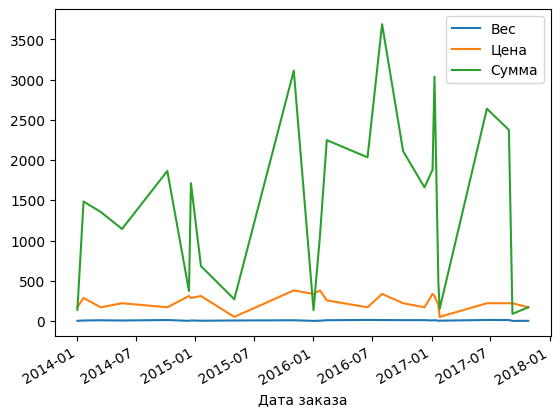

In [ ]:
df[(df.Товар == 'Томаты') & (df.Регион == 'Орловская область')].set_index('Дата заказа').plot()

### Построение модели

В качестве модели буду использовать CatBoost, за его простоту использования и довольно высокую эффективность.


In [ ]:
!pip install -q catboost

import pandas as pd
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Определение тренировочных и проверочных данных

In [ ]:
x = df.drop(['Сумма', 'Номер заказа'], axis=1)
y = df['Сумма']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=73)

Построение и тестирование модели. Текущее количество итераций, скорости обучения и глубины показали наилучший результат.

In [ ]:
model = CatBoostRegressor(iterations=13000,
                          learning_rate=0.01,
                          depth=6,
                          loss_function='RMSE',
                          random_seed=73)

model.fit(x_train, y_train,
          cat_features=['Товар', 'Регион'],
          eval_set=(x_test, y_test),
          verbose=500)

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

0:	learn: 2823.1074392	test: 2896.1247027	best: 2896.1247027 (0)	total: 62.1ms	remaining: 13m 27s
500:	learn: 111.4114602	test: 127.6444431	best: 127.6444431 (500)	total: 9.41s	remaining: 3m 54s
1000:	learn: 50.3946503	test: 56.9028645	best: 56.9028645 (1000)	total: 16.4s	remaining: 3m 16s
1500:	learn: 34.1342087	test: 39.4199909	best: 39.4199909 (1500)	total: 25.5s	remaining: 3m 15s
2000:	learn: 26.3150185	test: 31.9530123	best: 31.9530123 (2000)	total: 33.9s	remaining: 3m 6s
2500:	learn: 21.9146525	test: 28.0110967	best: 28.0110967 (2500)	total: 36.9s	remaining: 2m 34s
3000:	learn: 18.9082616	test: 25.4275495	best: 25.4275495 (3000)	total: 39.1s	remaining: 2m 10s
3500:	learn: 16.6872893	test: 23.5900393	best: 23.5900393 (3500)	total: 41.3s	remaining: 1m 51s
4000:	learn: 15.0819405	test: 22.2467383	best: 22.2467383 (4000)	total: 43.5s	remaining: 1m 37s
4500:	learn: 13.8216933	test: 21.2260448	best: 21.2260448 (4500)	total: 47.1s	remaining: 1m 29s
5000:	learn: 12.7537142	test: 20.40377